In [1]:
'''
Input: clustering result from MMseqs2 (tsv file)
Output: U-shaped plot to identify auxilary/core proteins
'''

'\nInput: clustering result from MMseqs2 (tsv file)\nOutput: U-shaped plot to identify auxilary/core proteins\n'

In [ ]:
# The first U-shaped plot:
# X-axis: protein cluster size
# Y-axis: Counts

In [1]:
# read file
import pandas as pd

tsv_read = pd.read_csv("/Users/guangyichen/Desktop/WIBI/Master-Thesis/Data/Final-Data/Clustering/clusterRes_0.5/clusterRes_0.5_cluster.tsv", header = None, delim_whitespace=True)
representative_proteins = tsv_read[0]
#print(representative_proteins)

In [47]:
# Loop through file to get the size of each cluster
counter_list = []

for i in range(0,representative_proteins.size-1):
    if (representative_proteins[i] != "-"):
        counter = 1
        for j in range(i+1,representative_proteins.size-1):
           
            if (representative_proteins[j] == representative_proteins[i]):
                counter += 1
                representative_proteins[j] = "-"
            else:
                break
            
        counter_list.append(counter)
            
#print(counter_list)

Text(0, 0.5, 'Count')

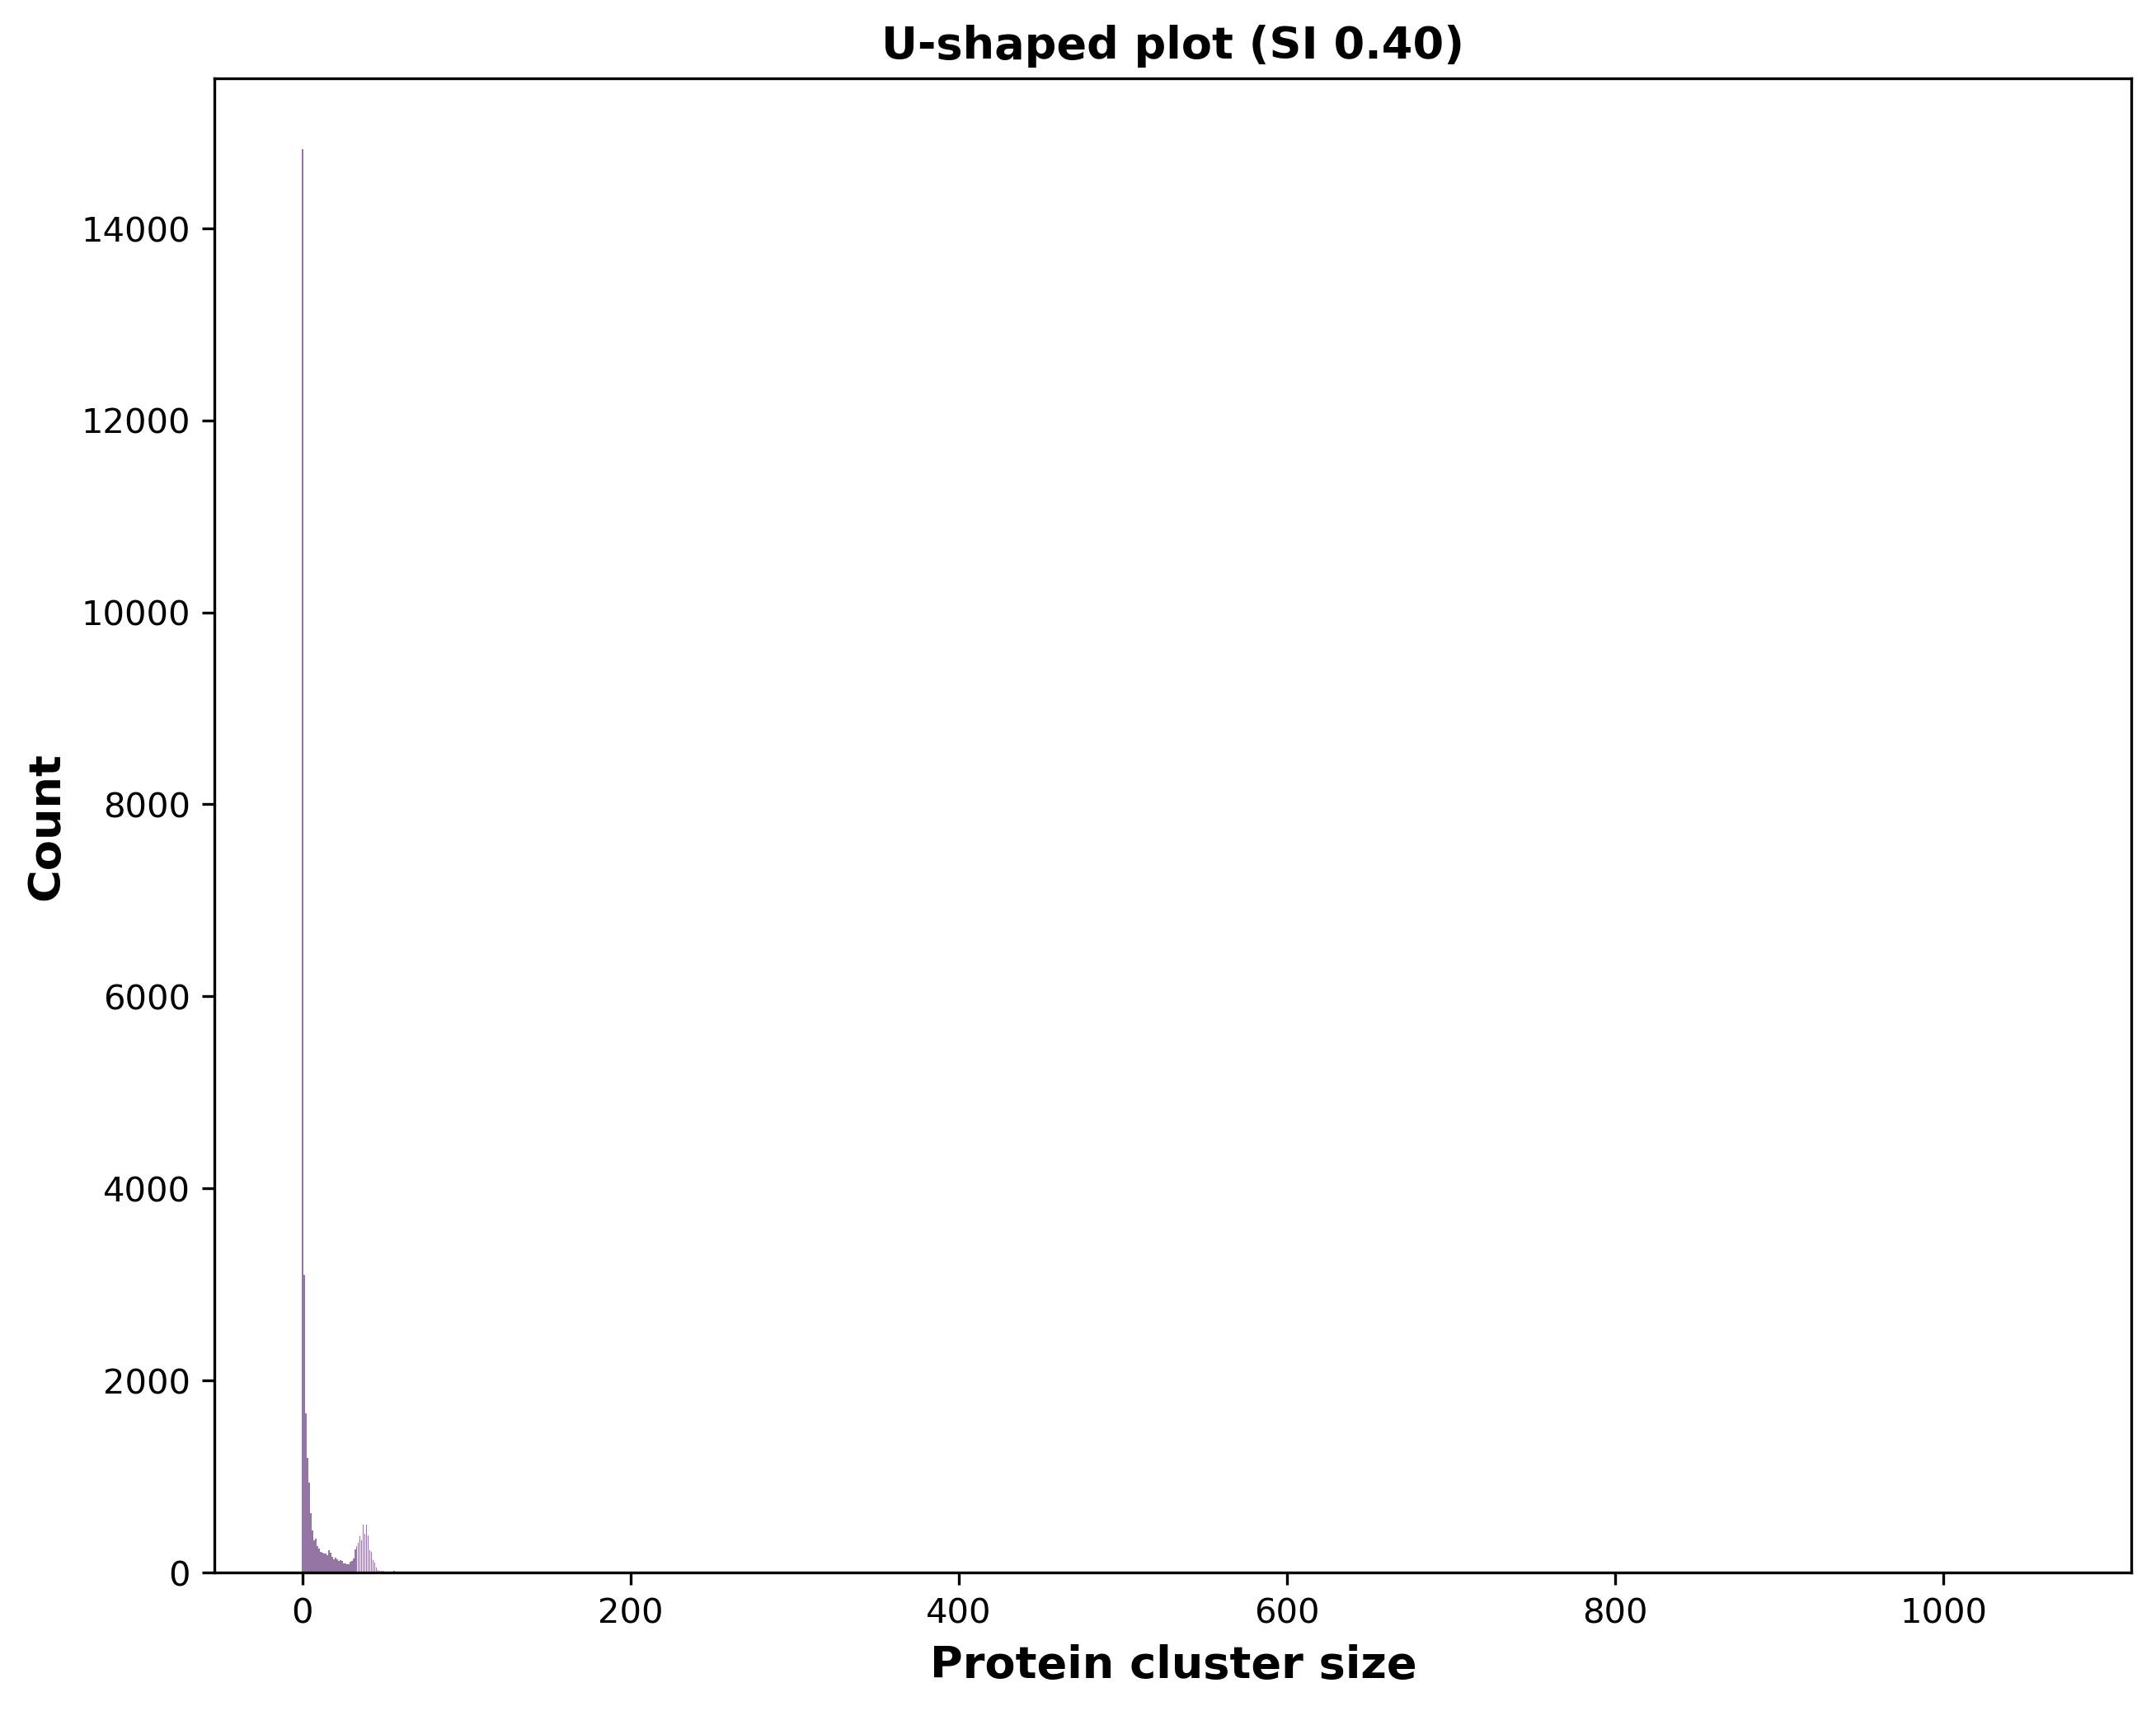

In [25]:
# plot the U-shaped Figure
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=300)

max_cluster_size = max(counter_list)

u_shape_bar_list = []
for i in range(1,max_cluster_size):
    counter = 1;
    for j in counter_list:
        if (i == j):
            counter += 1
    u_shape_bar_list.append(counter)
    
br = np.arange(len(u_shape_bar_list))
plt.bar(br, u_shape_bar_list, width = 0.9, color = (0.3,0.1,0.4,0.6))
plt.title("U-shaped plot (SI 0.40)", fontweight ='bold', fontsize = 13)
plt.xlabel("Protein cluster size", fontweight ='bold', fontsize = 13)
plt.ylabel("Count", fontweight ='bold', fontsize = 13)

In [3]:
# The second U-shaped plot:
# X-axis: unique clade number per protein cluster
# Y-axis: Counts

In [33]:
# read file
import pandas as pd

tsv_read = pd.read_csv("/Users/guangyichen/Desktop/WIBI/Master-Thesis/Results/Clustering-AF/clusterRes_0.7/clusterRes_0.7_cluster.tsv", header = None, delim_whitespace=True)
representative_proteins = tsv_read[0]
all_proteins = tsv_read[1]
#print(all_proteins)

In [34]:
import re
# Loop through file to store each cluster as list of list
clades_counter_list = []

for i in range(0,all_proteins.size-1):
    if (representative_proteins[i] != "-"):
        each_cluster = []
        each_cluster.append(representative_proteins[i])
        for j in range(i+1,representative_proteins.size-1):
            if (representative_proteins[j] == representative_proteins[i]):
                each_cluster.append(all_proteins[j])
                representative_proteins[j] = "-"
            else:
                break

        clades_list = []
        for k in range(0, len(each_cluster)-1):
            each_protein = each_cluster[k]
            #print(each_protein)
            
            '''
            # For Curated Data: 
            if (each_protein[0:4] == "HIPS"):
                each_clade = re.sub("_BOGUS_[0-9]{2,}", "", each_protein)
            else:
                each_clade = re.sub(".gb.{2,}", "", each_protein)
                #each_clade = re.sub("_BOGUS_[0-9]{3,}$", "", each_clade)
                each_clade = re.sub("_[a-z | A-Z].*.", "", each_clade)
                #each_clade = re.sub("_WP.*.$", "", each_clade)
                #each_clade = re.sub(".gb_[a-z | A-Z ].*.", "", each_clade)
            '''    
            
            # For AF Data: 
            each_clade = re.sub("-.{1,}$","",each_protein)
            
            clades_list.append(each_clade)

        clades_set = set(clades_list)
        #print(clades_set)
        clades_counter_list.append(len(clades_set))
        #print("----")

Text(0, 0.5, 'Count')

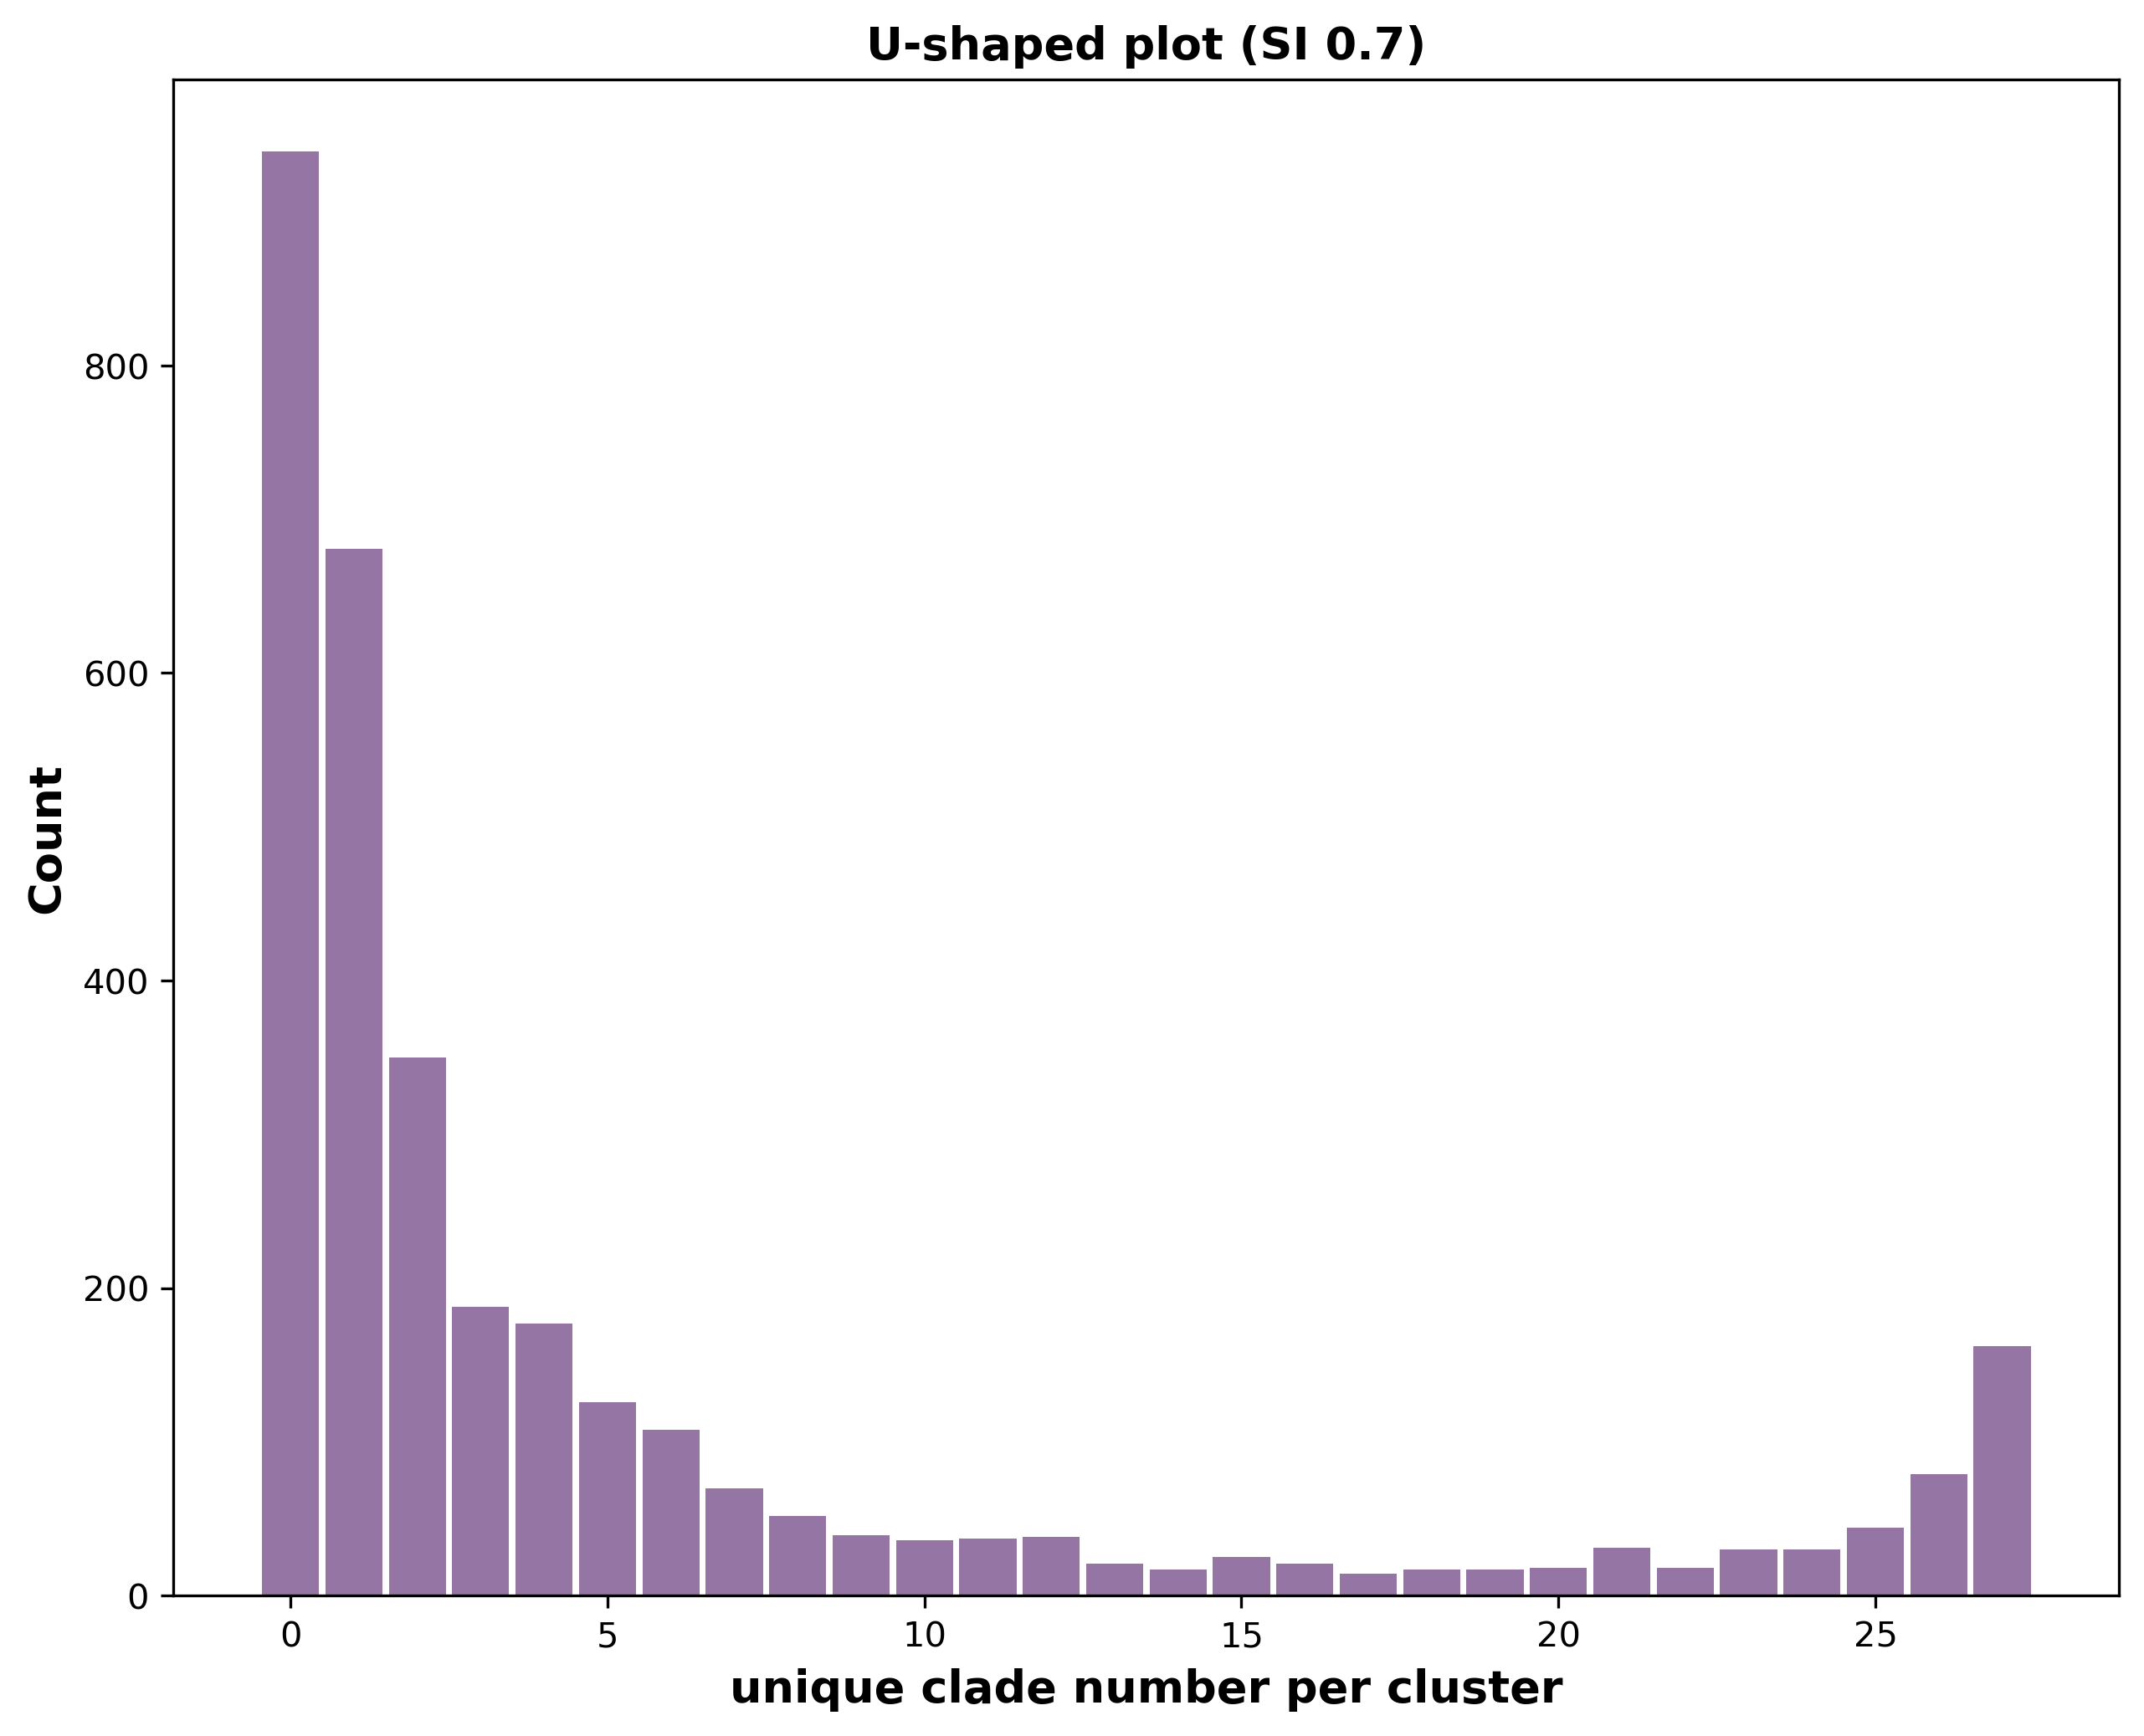

In [35]:
### print(clades_counter_list)

# plot the U-shaped Figure
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=300)

max_cluster_size = max(clades_counter_list)

u_shape_bar_list = []
for i in range(1,max_cluster_size):
    counter = 1;
    for j in clades_counter_list:
        if (i == j):
            counter += 1
    u_shape_bar_list.append(counter)
    
br = np.arange(len(u_shape_bar_list))
plt.bar(br, u_shape_bar_list, width = 0.9, color = (0.3,0.1,0.4,0.6)) 
plt.title("U-shaped plot (SI 0.7)", fontweight ='bold', fontsize = 13) 
plt.xlabel("unique clade number per cluster", fontweight ='bold', fontsize = 13) 
plt.ylabel("Count", fontweight ='bold', fontsize = 13) 